In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Colab\ Notebooks/Face_Recognition

/content/drive/My Drive/Colab Notebooks/Face_Recognition


In [3]:
%ls

branch.ipynb  data/  dev/  README.md  Untitled.ipynb


In [ ]:
!unzip data/CroppedYale.zip


In [ ]:
#all required packages
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor

!pip install einops
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary

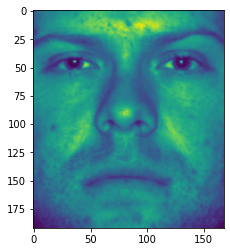

In [ ]:
img = Image.open('CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm')
#/content/drive/MyDrive/Colab Notebooks/Face_Recognition/CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm
fig = plt.figure()
plt.imshow(img)


In [ ]:
# resize to imagenet size 
transform = Compose([Resize((224, 224)), ToTensor()])
x = transform(img)
x = x.unsqueeze(0) # add batch dim
x.shape

torch.Size([1, 1, 224, 224])

In [ ]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels: int = 3, patch_size: int = 16, emb_size: int = 768):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            # break-down the image in s1 x s2 patches and flat them
            Rearrange('b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=patch_size, s2=patch_size),
            nn.Linear(patch_size * patch_size * in_channels, emb_size)
        )
                
    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)
        return x
    
PatchEmbedding()(x).shape


RuntimeError: ignored